In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_df=pd.read_csv('/content/drive/MyDrive/ML Assign/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Calculate the correlation between all columns
corr_matrix = diabetes_df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
outcome_corr = corr_matrix["Outcome"]
outcome_corr=outcome_corr.sort_values(ascending=False)
outcome_corr

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Here we can observe the factors leading to diabetes in the order of dec importance are Glucose>BMI>Age>Pregnancies> DiabetesPedigreeFunction Insulin.

As observed, the leveln of insulin is not much important parameter in determini8ng wheter a person has diabetis or not

<Axes: >

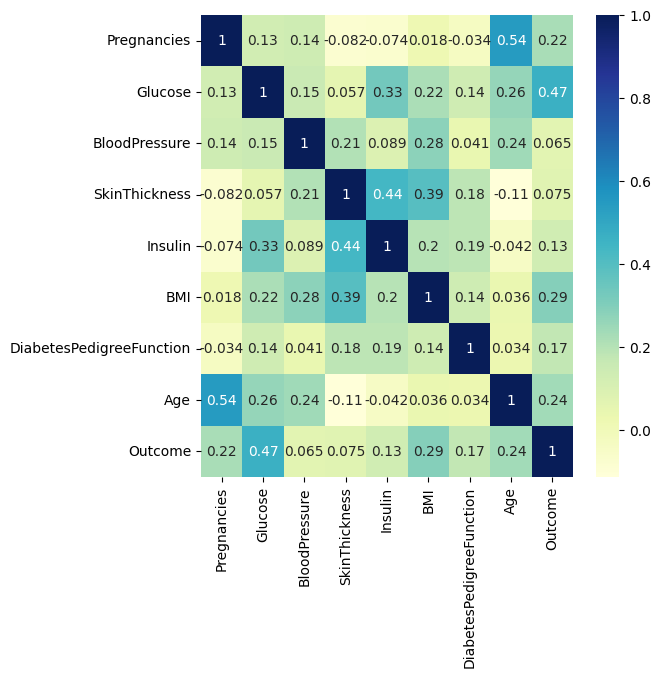

In [ ]:
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)

In [ ]:
diabetes_df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


###Exploring Glucose parameter

In [ ]:
glucose_stats = diabetes_df["Glucose"].describe()
print(glucose_stats)

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


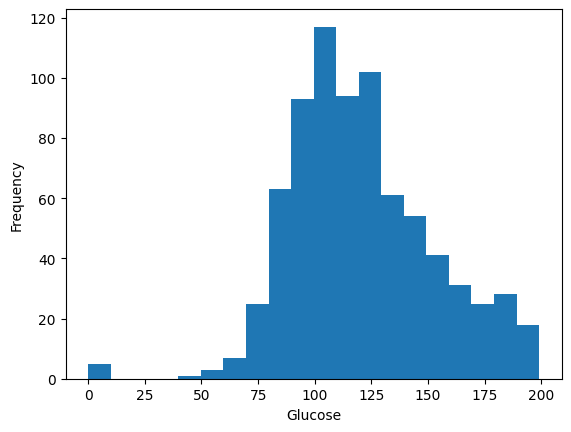

In [ ]:
plt.hist(diabetes_df["Glucose"], bins=20)
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='Outcome', ylabel='Glucose'>

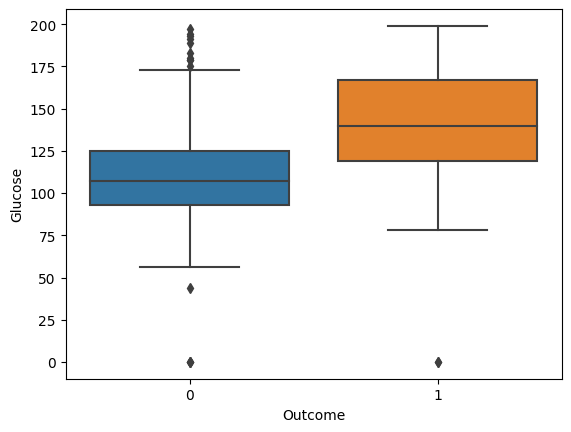

In [ ]:
sns.boxplot(x="Outcome", y="Glucose", data=diabetes_df)


From the graph it appears as if the mean range of Glucose level lies between 90 to 120. Now lets find out the age wise distribution of it

In [ ]:
# Filter the dataset to only include observations with normal glucose levels
normal_glucose_df = diabetes_df.loc[(diabetes_df["Glucose"] >= 80) & (diabetes_df["Glucose"] <= 120)]

# Group the filtered dataset by age and compute the mean glucose level for each age group
normal_glucose_by_age = normal_glucose_df.groupby("Age")["Glucose"].mean()
normal_glucose_by_age

Age
21    100.725000
22     98.170732
23    101.750000
24    103.344828
25     96.500000
26    104.736842
27    101.315789
28     97.555556
29    105.071429
30    108.250000
31    101.692308
32     97.300000
33    104.142857
34    107.500000
35    100.500000
36     96.400000
37    108.400000
38    107.250000
39     90.000000
40    109.750000
41    102.000000
42     99.166667
43     99.600000
44    107.500000
45    107.000000
46    102.000000
48    107.600000
50    105.500000
52    103.666667
53    105.000000
54    109.000000
55    103.000000
56     98.333333
57    104.500000
58    104.333333
60    109.000000
62    105.000000
63    101.000000
64    120.000000
65    103.000000
66    114.000000
68     91.000000
72    119.000000
Name: Glucose, dtype: float64

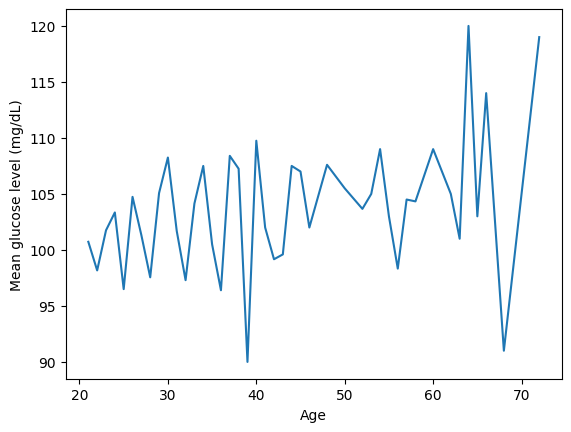

In [ ]:
plt.plot(normal_glucose_by_age.index, normal_glucose_by_age.values)
plt.xlabel("Age")
plt.ylabel("Mean glucose level (mg/dL)")
plt.show()

Here we have found the distribution of mean glucose level of every age. But the problem is the range of normal glucose s different age. So we need to define the normal glucose level wrt to that

In [ ]:
# Define the age range bins
age_bins = [20, 30, 40, 50, 60, 70, 80]

# Define the age range labels
age_labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

# Create a new column in the dataset indicating the age range for each observation
diabetes_df["Age Range"] = pd.cut(diabetes_df["Age"], bins=age_bins, labels=age_labels, include_lowest=True)

# Group the dataset by age range and compute the mean glucose level for each group
glucose_by_age_range = diabetes_df.groupby("Age Range")["Glucose"].mean()



In [ ]:
glucose_by_age_range

Age Range
20-29    114.175060
30-39    126.178344
40-49    124.884956
50-59    141.148148
60-69    137.560000
70-79    119.000000
Name: Glucose, dtype: float64

We have found the mean Glucose level for the given range of ages for the data set

### BMI parameter

We will now explore the BMI parameter of the dataset

In [ ]:
diabetes_df["BMI"].isnull().sum()

0

In [ ]:
diabetes_df["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

<Axes: xlabel='BMI', ylabel='Outcome'>

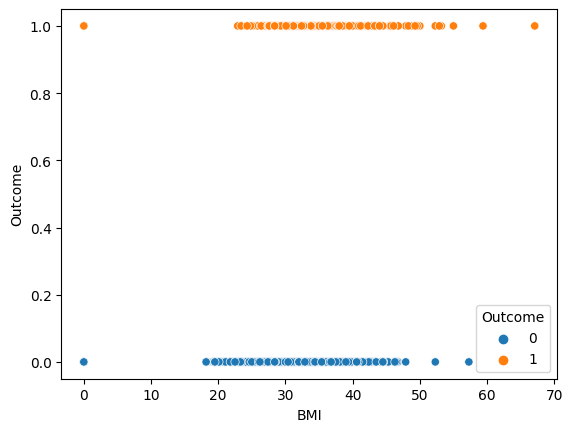

In [ ]:
sns.scatterplot(x="BMI", y="Outcome", data=diabetes_df, hue="Outcome")

<Axes: xlabel='Outcome', ylabel='BMI'>

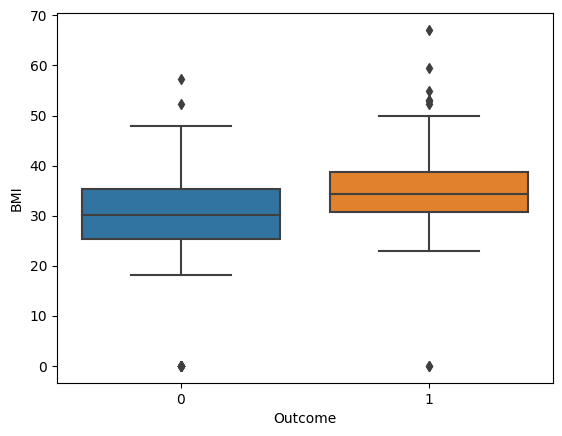

In [ ]:
sns.boxplot(x="Outcome", y="BMI", data=diabetes_df)

As there is not much difference between the BMI values of both the groups. Therefore BMI is not much of a determinant factor in detection of diabetes

<Axes: xlabel='Glucose', ylabel='BMI'>

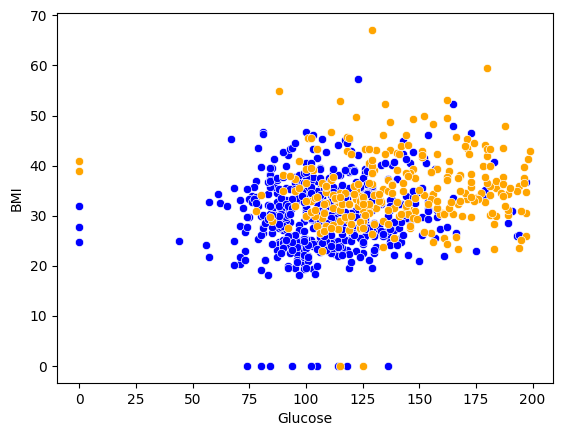

In [ ]:
sns.scatterplot(x="Glucose", y="BMI", data=diabetes_df[diabetes_df["Outcome"] == 0], color="blue")
sns.scatterplot(x="Glucose", y="BMI", data=diabetes_df[diabetes_df["Outcome"] == 1], color="orange")

This scatter plot shows that when Glucose of a person is high, the chances that he or she may be diabetic is high even: if the BMI level might lie in the normal range

In [ ]:
# Seperating the data and the labels
X=diabetes_df.drop(columns=['Outcome','Age Range'], axis=1)
y=diabetes_df['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


###Data Standardization

In [ ]:
scalar=StandardScaler()
X_standard=scalar.fit_transform(X)
X=X_standard

In [ ]:
#splitting the data

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

###Implementing Logistic Regression model to solve the classification problem

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Use trained model to make predictions on test data
y_pred = logreg.predict(X_test)

In [ ]:
# Evaluate performance of logistic regression model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1-score: 0.5599999999999999


This basic model is abbout 72 percent accurate. We can improve the accuracy score by using hyperparameter tuning

Therefore we will perform GridSearch CV on the above model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and their values for grid search
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

clf= GridSearchCV(logreg, hyperparameters,cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
# Print best hyperparameters
print('Best penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])
print('Best solver:', clf.best_estimator_.get_params()['solver'])

Best penalty: l1
Best C: 1
Best solver: liblinear


In [ ]:
logreg1=LogisticRegression(penalty='l1', C=1,solver='liblinear')
logreg1.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
y_pred2 = logreg1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1-score: 0.5599999999999999


In [ ]:
y_pred = logreg1.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.7931596091205212


###Applying Neural Network to train the model for better accuracy

### Using SLP (no hidden layers)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=8, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 1ms/step - loss: 0.8166 - accuracy: 0.4870
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7698 - accuracy: 0.5179
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 0.7297 - accuracy: 0.5489
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5749
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6059
Epoch 6/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.6401
Epoch 7/150
62/62 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6531
Epoch 8/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6873
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7068
Epoch 10/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7199
Epoch 11/

In [ ]:
# evaluate the model on the testing dataset
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7143
Accuracy: 71.43


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(1, input_dim=8, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create the Keras classifier for use in scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)


<ipython-input-50-5686ffe663ab>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
batch_size = [10, 20, 40]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.780155 using {'batch_size': 20, 'epochs': 100}
0.775250 (0.009602) with: {'batch_size': 10, 'epochs': 50}
0.780155 (0.018257) with: {'batch_size': 10, 'epochs': 100}
0.732907 (0.028729) with: {'batch_size': 20, 'epochs': 50}
0.780155 (0.024448) with: {'batch_size': 20, 'epochs': 100}
0.715034 (0.042091) with: {'batch_size': 40, 'epochs': 50}
0.775250 (0.021502) with: {'batch_size': 40, 'epochs': 100}


In [ ]:
# evaluate the best model on the testing dataset
_, accuracy = grid_result.best_estimator_.model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7143
Accuracy: 71.43


###Adding Hidden layers to improve measure of accuracy

In [ ]:
mlp_model=Sequential()
mlp_model.add(Dense(12, input_dim=8, activation='relu'))
mlp_model.add(Dense(8, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

In [ ]:
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mlp_model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
62/62 [==============================] - 1s 1ms/step - loss: 0.7429 - accuracy: 0.5668
Epoch 2/50
62/62 [==============================] - 0s 1ms/step - loss: 0.6358 - accuracy: 0.7117
Epoch 3/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7443
Epoch 4/50
62/62 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.7443
Epoch 5/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7492
Epoch 6/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7590
Epoch 7/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7687
Epoch 8/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7769
Epoch 9/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7752
Epoch 10/50
62/62 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7752
Epoch 11/50
62/62 [

In [ ]:
# Evaluate the model
score = mlp_model.evaluate(X_test, y_test)
print("Test Accuracy: ", score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7273
Test Accuracy:  0.7272727489471436


In [ ]:
score = mlp_model.evaluate(X_train, y_train)
print("Training Accuracy: ", score[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8094
Training Accuracy:  0.8094462752342224


Here we are getting the test accuracy of about 75 percent when using the MLP model and the training accuracy of the model is about 92 percent. Therefore no overfitting is occuring in the model.


We will now try to improve the model accuracy using hyperparameter tuning

In [ ]:
# Define a function to create the MLP model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the Keras model in a scikit-learn estimator
estimator = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-60-e7b2943111ce>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [50, 100],
     'optimizer': ['adam', 'sgd', 'rmsprop']
    
}

In [ ]:
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fbdf0d99610>,
             param_grid={'batch_size': [10, 20, 40], 'epochs': [50, 100],
                         'optimizer': ['adam', 'sgd', 'rmsprop']})

In [ ]:
# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'batch_size': 10, 'epochs': 100, 'optimizer': 'adam'}
Best score: 0.7883113384246826


In [ ]:
best_batch_size = grid_search.best_params_['batch_size']
best_epochs = grid_search.best_params_['epochs']
best_optimizer = grid_search.best_params_['optimizer']

In [ ]:
best_model = Sequential()
best_model.add(Dense(12, input_dim=8, activation='relu'))
best_model.add(Dense(8, activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))

# Compile the model with the best optimizer, loss function, and metrics
best_model.compile(loss='binary_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])

In [ ]:
history= best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size,validation_data=(X_test, y_test))

In [ ]:
score = best_model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6883
Test loss: 0.6228813529014587
Test accuracy: 0.6883116960525513


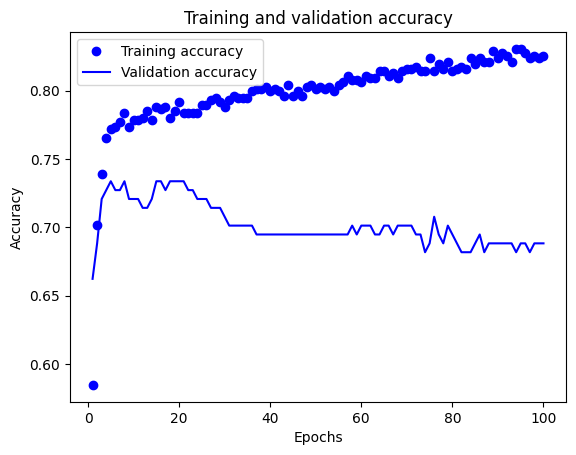

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Therefore we can see that by using Gridsearch cv and fitting the best parameters into the model we get a accuracy score of 75.32 percent.

Of all the models we have trained, MLP using GridSearchCV is giving us the max accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

print(classification_report(y_test, y_pred_classes))


5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       100
           1       0.55      0.57      0.56        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



In [ ]:
acc = accuracy_score(y_test, y_pred_classes)
prec = precision_score(y_test, y_pred_classes)
rec = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Overall Accuracy: {:.2f}%".format(acc*100))
print("Overall Precision: {:.2f}%".format(prec*100))
print("Overall Recall: {:.2f}%".format(rec*100))
print("Overall F1 Score: {:.2f}%".format(f1*100))

Overall Accuracy: 68.83%
Overall Precision: 55.36%
Overall Recall: 57.41%
Overall F1 Score: 56.36%


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**For the model using MLP with GridSearchCV, we are getting recall score of Class 0 as 0.80 ie it is predicting 80 percent of the non-diabetic cases correctly whereas for class 1 ie diabetic cases it having 67 percent recall score. 

As a model deployed in medical diagonisis, the problem of False Negatives is more important than the other ones. So we must focus on increasing the recall score for class 1**

### Saving the best performing model (best_model)

In [ ]:
import pickle

In [ ]:
filename="best_model.sav"
pickle.dump(best_model,open(filename,'wb'))

In [ ]:
##loading the saved model
loaded_model=pickle.load(open('best_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray (input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)


if(prediction[0]==0):
  print("The person is not diabetic")

else:
  print("The person is diabetic")
 

   

 



In [ ]:
filename="log_reg_model.sav"
pickle.dump(logreg,open(filename,'wb'))

In [ ]:
##loading the saved model
loaded_model=pickle.load(open('log_reg_model.sav', 'rb'))